<a href="https://colab.research.google.com/github/Lizethmurcia29/TIC_lizeth/blob/main/Copia_de_Ingest_Data_API_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Se importan las librerias
import requests   #Se conecta don la API
import json
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
API_KEY = '675694e2cf32cd8c608d0fa4f3c4de9d'  # Reemplazar con tu API Key de OpenWeather
ciudad = 'Bogotá'
#id_city = '3688689'
#url = f'https://api.openweathermap.org/data/2.5/weather?id={id_city}&appid={API_KEY}&units=metric'
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={API_KEY}&units=metric'

In [18]:
respuesta = requests.get(url)

if respuesta.status_code == 200:
    datos = respuesta.json()
    if 'main' in datos and 'weather' in datos:
        temperatura_actual = datos['main']['temp']
        descripcion_clima = datos['weather'][0]['description']
        print(f'Temperatura actual en {ciudad}: {temperatura_actual}°C')
        #print(f'Temperatura actual en {id_city}: {temperatura_actual}°C')
        #print(f'Descripción del clima: {descripcion_clima}')
    else:
        print('Error: No se encontraron los datos esperados en la respuesta.')
else:
    print(f'Error: No se pudo obtener los datos del clima. Código de estado: {respuesta.status_code}')

Temperatura actual en Bogotá: 12.73°C


In [19]:
# Reemplazar con tu API Key de OpenWeather
API_KEY = '675694e2cf32cd8c608d0fa4f3c4de9d'

# Lista de ciudades colombianas
ciudades = ['Bogota', 'Medellin', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', 'Bucaramanga', 'Pereira', 'Santa Marta', 'Ibagué']

# Lista para almacenar los datos de temperatura
datos_temperatura = []

for ciudad in ciudades:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad},CO&appid={API_KEY}&units=metric'
    respuesta = requests.get(url)

    if respuesta.status_code == 200:
        datos = respuesta.json()
        if 'main' in datos:
            temperatura_actual = datos['main']['temp']
            datos_temperatura.append({'Ciudad': ciudad, 'Temperatura': temperatura_actual})
        else:
            print(f'Error: No se encontraron los datos de temperatura para {ciudad}.')
    else:
        print(f'Error: No se pudo obtener los datos del clima para {ciudad}. Código de estado: {respuesta.status_code}')

# Crear un DataFrame de Pandas con los datos de temperatura
df_temperatura = pd.DataFrame(datos_temperatura)

print(df_temperatura)

         Ciudad  Temperatura
0        Bogota        12.73
1      Medellin        19.57
2          Cali        22.00
3  Barranquilla        29.88
4     Cartagena        29.79
5        Cúcuta        27.97
6   Bucaramanga        22.73
7       Pereira        14.47
8   Santa Marta        29.03
9        Ibagué        18.09


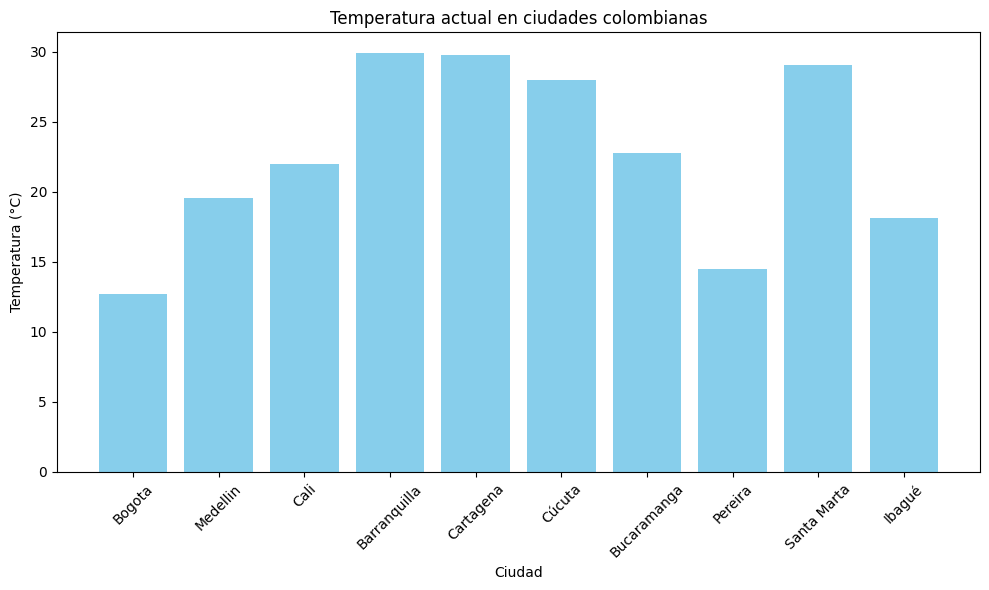

In [20]:
# Crear gráfico de barras con las temperaturas de las ciudades
plt.figure(figsize=(10, 6))
plt.bar(df_temperatura['Ciudad'], df_temperatura['Temperatura'], color='skyblue')
plt.xlabel('Ciudad')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura actual en ciudades colombianas')
plt.xticks(rotation=45)  # Rotar los nombres de las ciudades para mejor legibilidad
plt.tight_layout()  # Ajusta el gráfico para evitar solapamiento de etiquetas
plt.show()


En el grafico se represntan algunas ciudades de Colombia con su temperatura actual, en donde se tiene en cuenta que los datos varian desde los 12°C en Bogotá hasta más de 30°C en ciudades como Cartagena y Santa Marta, esto tiene que ver por la ubicación geografica y así mismo sus respectivas altitudes.

Cartagena y Santa Marta presentan las temperaturas más altas, ambas superando los 30°C, ciudades como Barranquilla, Cali y Cúcuta muestran temperaturas entre 25°C y 30°C, destacando su clima calido y  Bogotá tiene la temperatura más baja (aproximadamente 12°C), seguido por ciudades como Ibagué y Pereira.